# Installing and importing

In [33]:
!pip install byol-pytorch

In [2]:
import torch
from byol_pytorch import BYOL
from torchvision import models

import matplotlib.pyplot as plt

# Looking into model

In [3]:
resnet = models.resnet50(pretrained=True)

learner = BYOL(resnet,    image_size = 224,    hidden_layer = 'avgpool')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Model architecure

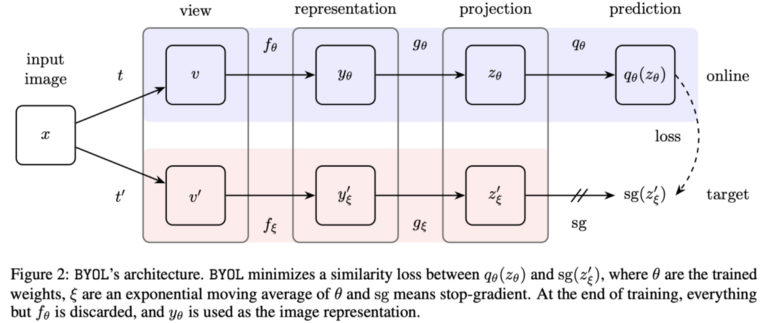

In [4]:
learner

BYOL(
  (net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Co

# Initializing optimizer

In [5]:
opt = torch.optim.Adam(learner.parameters(), lr=3e-4)

# Generating sample data

In [6]:
epochs = 5
batch_size = 32   # using beyond 32 crashes the colab notebook(GPU version)
image_size = 224

In [7]:
def sample_unlabelled_images():
    return torch.randn(batch_size, 3, image_size, image_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


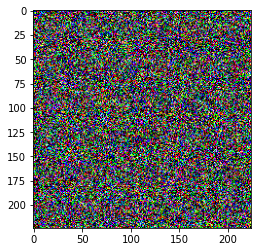

In [9]:
images = sample_unlabelled_images()
plt.imshow(images[1].resize_((224,224,3)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

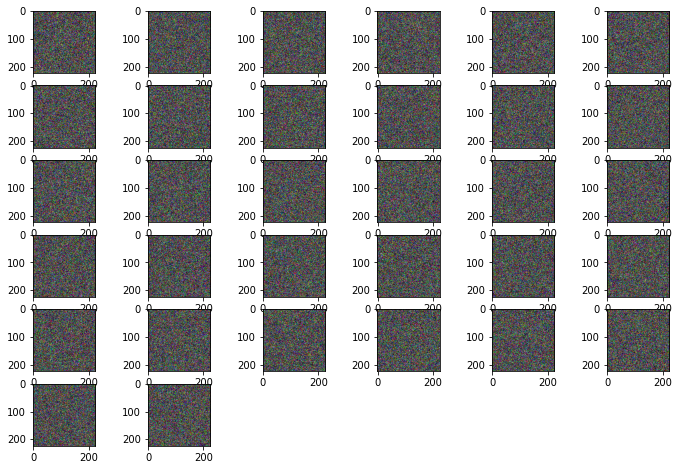

In [10]:
plt.figure(figsize = (12,8))

for x in range( 32):
  plt.subplot(6,6 , x + 1)
  plt.imshow(images[x].resize_((224,224,3)))

# Training model

In [11]:
for x in range(epochs):
    images = sample_unlabelled_images()
    loss = learner(images)
    print('loss for' , x  , ' : ', loss )
    opt.zero_grad()
    loss.backward()
    opt.step()
    learner.update_moving_average() # update moving average of target encoder

loss for 0  :  tensor(4.0578, grad_fn=<MeanBackward0>)
loss for 1  :  tensor(2.5415, grad_fn=<MeanBackward0>)
loss for 2  :  tensor(2.1088, grad_fn=<MeanBackward0>)
loss for 3  :  tensor(1.9596, grad_fn=<MeanBackward0>)
loss for 4  :  tensor(1.9057, grad_fn=<MeanBackward0>)


In [12]:
#dir(loss)
loss

tensor(1.9057, grad_fn=<MeanBackward0>)

# Loading pretrained model

# Saving model

In [ ]:
# save your improved network
torch.save(resnet.state_dict(), './improved-net.pt')